In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy import stats
from scipy.special import inv_boxcox
from sklearn.preprocessing import PowerTransformer
from gplearn.genetic import SymbolicTransformer
from pysr import PySRRegressor

In [3]:
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None, na_values='?')

/var/folders/lr/rqpgb0714cx2sytn8gyfflq40000gn/T/ipykernel_36701/2562749936.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None, na_values='?')


In [5]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
df.drop('car_name', axis=1, inplace=True)

In [8]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

/var/folders/lr/rqpgb0714cx2sytn8gyfflq40000gn/T/ipykernel_36701/2223062471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


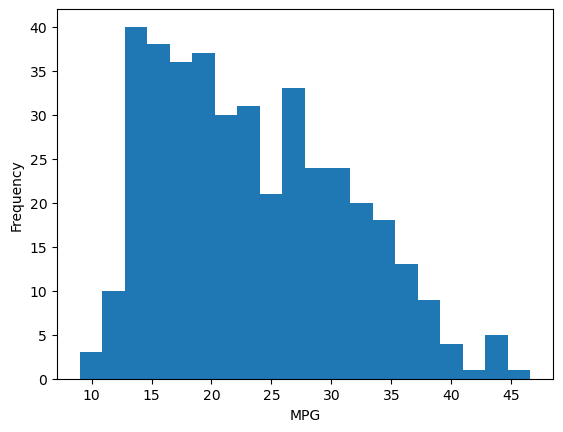

In [10]:
plt.figure()
plt.hist(df['mpg'], bins=20)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

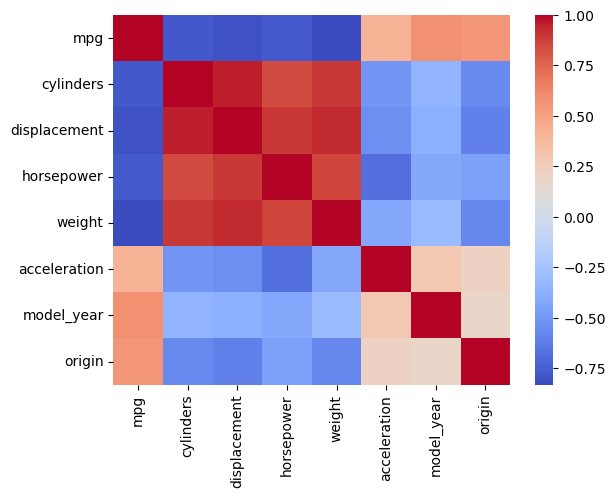

In [11]:
plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [12]:
X = df.drop('mpg', axis=1)
y = df['mpg']

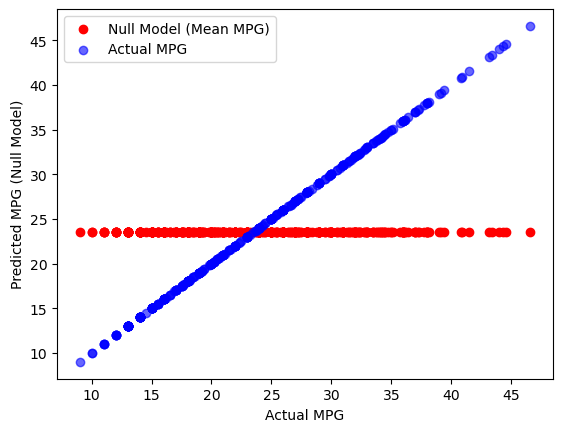

In [13]:
# Null model
null_prediction = np.mean(y)

plt.scatter(y, [null_prediction] * len(y), color='red', label='Null Model (Mean MPG)')
plt.scatter(y, y, color='blue', label='Actual MPG', alpha=0.6)

plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG (Null Model)')
plt.legend()
plt.show()

In [14]:
# In sample LR
X_const = sm.add_constant(X)
ols = sm.OLS(y, X_const).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          2.25e-141
Time:                        18:20:31   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.0587      4.583     -3.940   

In [15]:
y_pred_ols_insample = ols.predict(X_const)
rmse_ols_insample = np.sqrt(np.mean((y - y_pred_ols_insample) ** 2))
print("Linear Regression RMSE (in sample):", rmse_ols_insample)
print("Linear Regression R2 (in sample):", ols.rsquared)

Linear Regression RMSE (in sample): 3.303565081671418
Linear Regression R2 (in sample): 0.8209019153826466


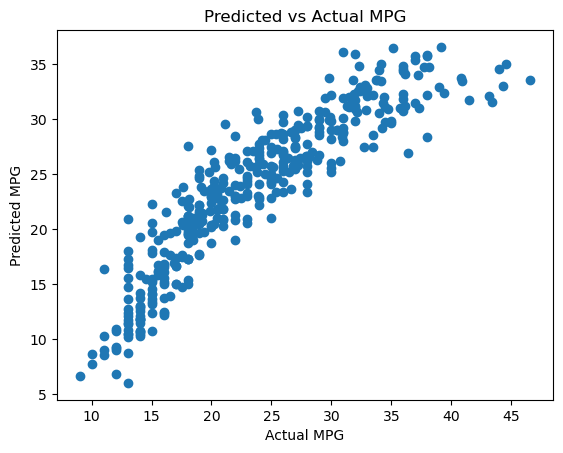

In [16]:
plt.scatter(y, y_pred_ols_insample)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [17]:
# train test split (80-20) LR
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
ols_split = sm.OLS(y_train, X_train).fit()
y_pred_test = ols_split.predict(X_test)

In [19]:
print(ols_split.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2212.
Date:                Tue, 10 Feb 2026   Prob (F-statistic):                   4.89e-261
Time:                        18:20:57   Log-Likelihood:                         -849.03
No. Observations:                 318   AIC:                                      1712.
Df Residuals:                     311   BIC:                                      1738.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [20]:
y_pred_test = ols_split.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Linear Regression RMSE: ", np.sqrt(mse_test))
print("Linear Regression R2: ", r2_test)

Linear Regression RMSE:  2.8489350490454357
Linear Regression R2:  0.8490428165303472


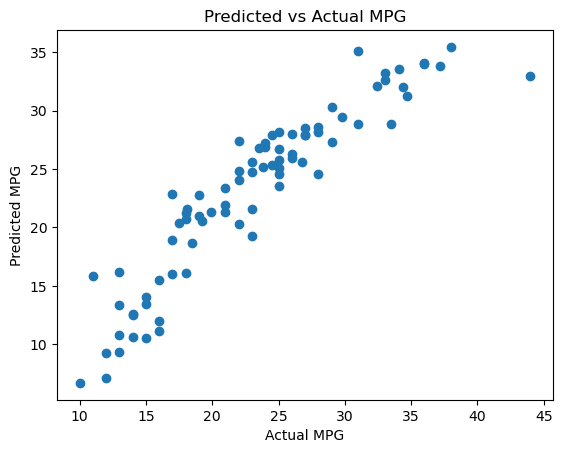

In [21]:
# Predicted vs Actual scatter plot
plt.scatter(y_test, y_pred_test)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

cv_scores_lr = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross Validation (Linear Regression): ", -cv_scores_lr.mean())

Cross Validation (Linear Regression):  15.114704491154859


In [29]:
# in sample ridge
ridge = sm.OLS(y, sm.add_constant(X)).fit_regularized(alpha=1.0, L1_wt=0.0)
y_pred_ridge_insample = ridge.predict(sm.add_constant(X))

In [30]:
rmse_ridge_insample = np.sqrt(np.mean((y - y_pred_ridge_insample) ** 2))
r2_ridge_insample = 1 - np.sum((y - y_pred_ridge_insample) ** 2) / np.sum((y - y.mean()) ** 2)
print("Ridge RMSE (in sample):", rmse_ridge_insample)
print("Ridge R2 (in sample):", r2_ridge_insample)

Ridge RMSE (in sample): 3.4244719377041646
Ridge R2 (in sample): 0.8075524304997254


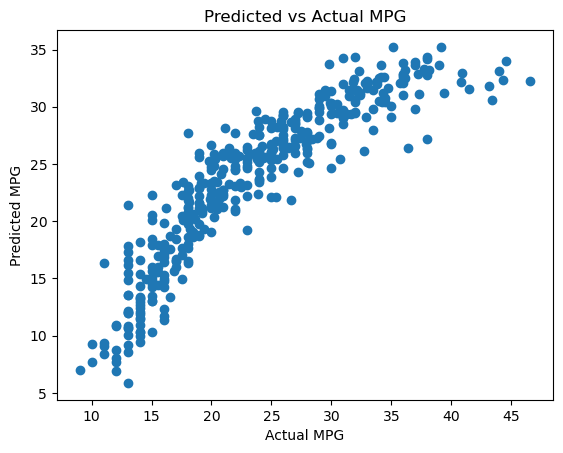

In [31]:
plt.scatter(y, y_pred_ridge_insample)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [32]:
# Ridge regression 
ridge_split = sm.OLS(y_train, sm.add_constant(X_train)).fit_regularized(alpha=1.0, L1_wt=0.0)
y_pred_ridge = ridge_split.predict(sm.add_constant(X_test))

In [33]:
rmse_ridge = np.sqrt(np.mean((y_test - y_pred_ridge) ** 2))
r2_ridge = 1 - np.sum((y_test - y_pred_ridge) ** 2) / np.sum((y_test - y_test.mean()) ** 2)
print("Ridge RMSE:", rmse_ridge)
print("Ridge R2:", r2_ridge)

Ridge RMSE: 2.967316307443033
Ridge R2: 0.8362367779175026


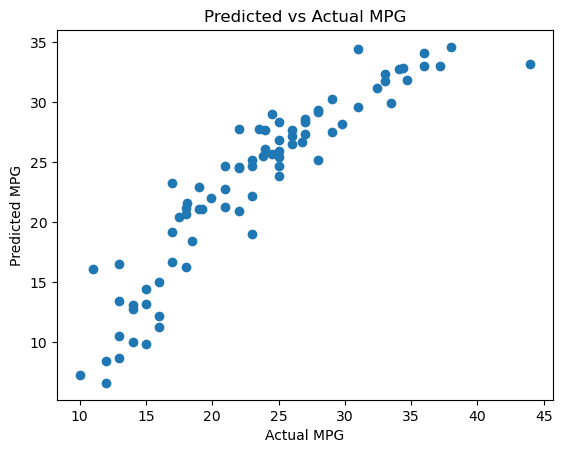

In [34]:
plt.scatter(y_test, y_pred_ridge)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [35]:
# in sample lasso
lasso = sm.OLS(y, sm.add_constant(X)).fit_regularized(alpha=0.1, L1_wt=1.0)
y_pred_lasso_insample = lasso.predict(sm.add_constant(X))

In [36]:
rmse_lasso_insample = np.sqrt(np.mean((y - y_pred_lasso_insample) ** 2))
r2_lasso_insample = 1 - np.sum((y - y_pred_lasso_insample) ** 2) / np.sum((y - y.mean()) ** 2)
print("Lasso RMSE (in sample):", rmse_lasso_insample)
print("Lasso R2 (in sample):", r2_lasso_insample)

Lasso RMSE (in sample): 4.369261749957201
Lasso R2 (in sample): 0.686713751021589


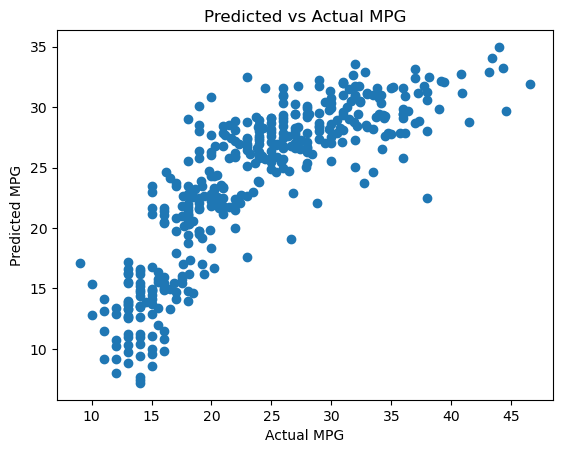

In [37]:
plt.scatter(y, y_pred_lasso_insample)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [38]:
lasso_split = sm.OLS(y_train, sm.add_constant(X_train)).fit_regularized(alpha=0.1, L1_wt=1.0)
y_pred_lasso = lasso_split.predict(sm.add_constant(X_test))

In [39]:
rmse_lasso = np.sqrt(np.mean((y_test - y_pred_lasso) ** 2))
r2_lasso = 1 - np.sum((y_test - y_pred_lasso) ** 2) / np.sum((y_test - y_test.mean()) ** 2)
print("Lasso RMSE:", rmse_lasso)
print("Lasso R2:", r2_lasso)

Lasso RMSE: 3.8315327359610722
Lasso R2: 0.7269552887856501


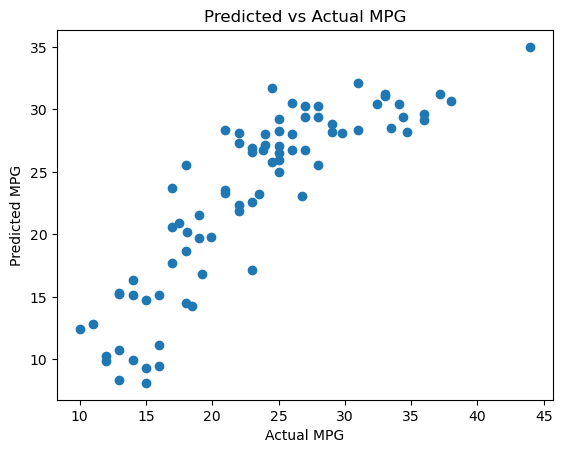

In [40]:
plt.scatter(y_test, y_pred_lasso)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [41]:
# Transformed regression (sqrt)
X_const = sm.add_constant(X)
y_sqrt = np.sqrt(y)

In [42]:
model_insample = sm.OLS(y_sqrt, X_const).fit()
y_pred_sqrt_insample = model_insample.predict(X_const)
y_pred_insample = y_pred_sqrt_insample ** 2

rmse_insample = np.sqrt(np.mean((y - y_pred_insample) ** 2))
r2_insample = 1 - np.sum((y - y_pred_insample) ** 2) / np.sum((y - y.mean()) ** 2)

print("Transformed RMSE (sqrt): ", rmse_insample)
print("Transformed R2 (sqrt): ", r2_insample)

Transformed RMSE (sqrt):  3.089473836655019
Transformed R2 (sqrt):  0.843363038234119


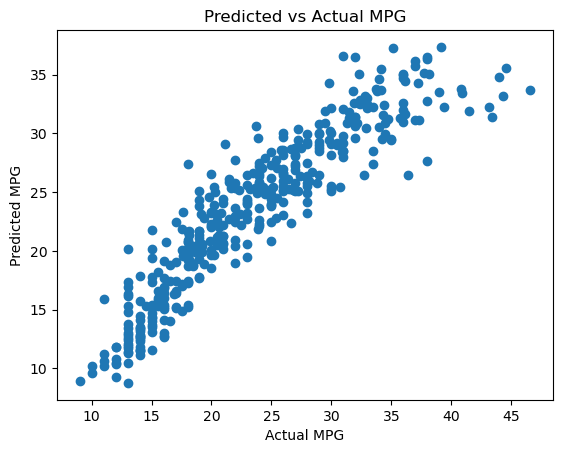

In [43]:
plt.scatter(y, y_pred_insample)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)

y_train_sqrt = np.sqrt(y_train)

model_split = sm.OLS(y_train_sqrt, X_train_c).fit()

y_pred_sqrt_test = model_split.predict(X_test_c)

y_pred_test = y_pred_sqrt_test ** 2

rmse_test = np.sqrt(np.mean((y_test - y_pred_test) ** 2))
r2_test = 1 - np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - y_test.mean()) ** 2)

print("Transformed RMSE (sqrt): ", rmse_test)
print("Transformed R2 (sqrt): ", r2_test)

Transformed RMSE (sqrt):  2.5370435435079957
Transformed R2 (sqrt):  0.8802861135546908


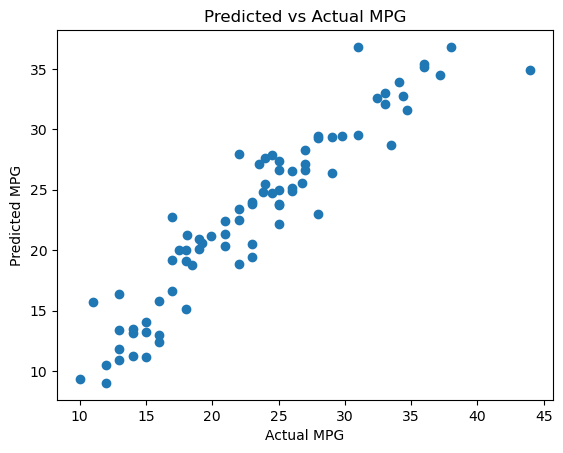

In [45]:
plt.scatter(y_test, y_pred_test)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [46]:
# Transformed regression (log1p)
X_const = sm.add_constant(X)

y_log = np.log1p(y)

model_insample = sm.OLS(y_log, X_const).fit()

y_pred_log_insample = model_insample.predict(X_const)

y_pred_insample = np.expm1(y_pred_log_insample)

rmse_insample = np.sqrt(np.mean((y - y_pred_insample) ** 2))
r2_insample = 1 - np.sum((y - y_pred_insample) ** 2) / np.sum((y - y.mean()) ** 2)

print("Transformed RMSE (log1p):", rmse_insample)
print("Transformed R2 (log1p):  ", r2_insample)

Transformed RMSE (log1p): 2.9726533077270925
Transformed R2 (log1p):   0.854984731700776


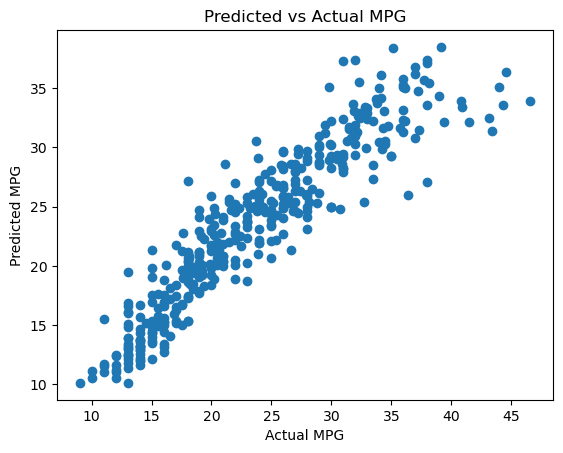

In [47]:
plt.scatter(y, y_pred_insample)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_c = sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)

y_train_log = np.log1p(y_train)

model_split = sm.OLS(y_train_log, X_train_c).fit()

y_pred_log_test = model_split.predict(X_test_c)

y_pred_test = np.expm1(y_pred_log_test)

rmse_test = np.sqrt(np.mean((y_test - y_pred_test) ** 2))
r2_test = 1 - np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - y_test.mean()) ** 2)

print("Transformed RMSE (log1p):", rmse_test)
print("Transformed R2 (log1p):  ", r2_test)

Transformed RMSE (log1p): 2.3872870340389776
Transformed R2 (log1p):   0.8940019278680558


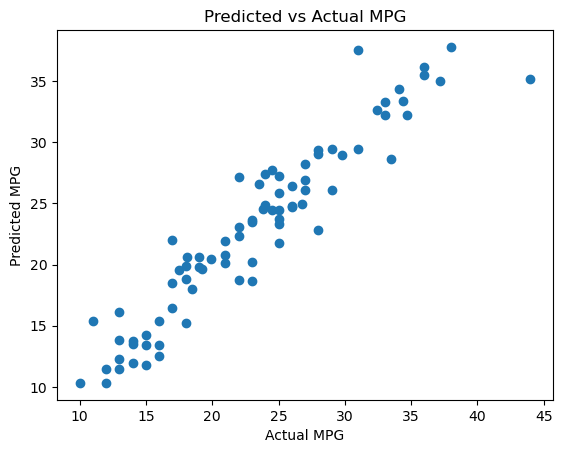

In [49]:
plt.scatter(y_test, y_pred_test)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [52]:
# Transformed regression (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')

y_yj = pt.fit_transform(y.values.reshape(-1, 1)).ravel()

lr = LinearRegression()
lr.fit(X, y_yj)

y_pred_yj = lr.predict(X)
y_pred = pt.inverse_transform(y_pred_yj.reshape(-1, 1)).ravel()

rmse_insample = np.sqrt(mean_squared_error(y, y_pred))
r2_insample = r2_score(y, y_pred)

print("Transformed RMSE (Yeo-Johnson): ", rmse_insample)
print("Transformed R2 (Yeo-Johnson): ", r2_insample)

Transformed RMSE (Yeo-Johnson):  3.0073169437564142
Transformed R2 (Yeo-Johnson):  0.8515830133984112


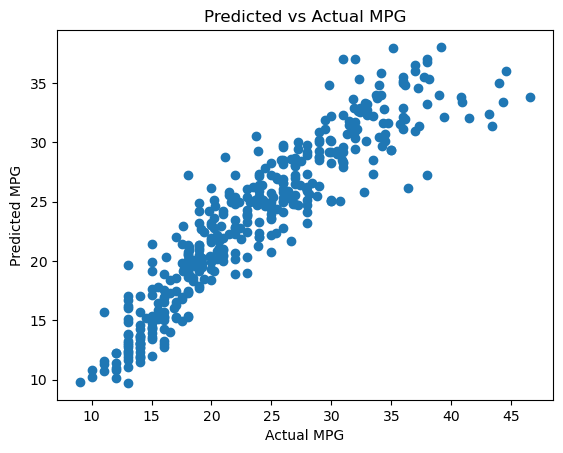

In [53]:
plt.scatter(y, y_pred)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pt = PowerTransformer(method='yeo-johnson')

y_train_yj = pt.fit_transform(y_train.values.reshape(-1, 1)).ravel()

lr = LinearRegression()
lr.fit(X_train, y_train_yj)

y_pred_yj_test = lr.predict(X_test)
y_pred_test = pt.inverse_transform(y_pred_yj_test.reshape(-1, 1)).ravel()

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("Transformed RMSE (Yeo-Johnson): ", rmse_test)
print("Transformed R2 (Yeo-Johnson): ", r2_test)

Transformed RMSE (Yeo-Johnson):  2.415966864667071
Transformed R2 (Yeo-Johnson):  0.8914397999185275


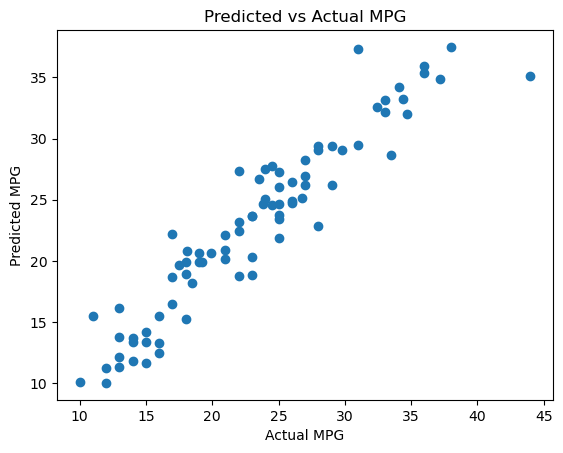

In [55]:
plt.scatter(y_test, y_pred_test)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [146]:
# In-sample symbolic regression
st = SymbolicTransformer(
    generations=20,
    population_size=2000,
    hall_of_fame=100,
    n_components=10,
    function_set=("add", "sub", "mul", "div", "sqrt", "log", "abs", "neg"),
    parsimony_coefficient=0.001,
    random_state=42
)

Z = st.fit_transform(X.values, y.values)

In [147]:
# Ridge on symbolic
ridge = Ridge(alpha=1.0)
ridge.fit(Z, y)

y_pred = ridge.predict(Z)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("SymRidgeRegression RMSE:", rmse)
print("SymRidgeRegression R2:", r2)

SymRidgeRegression RMSE: 2.8909015535343046
SymRidgeRegression R2: 0.8628512630995533


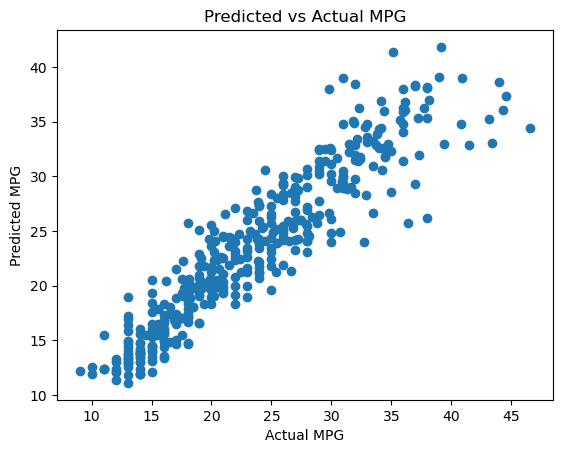

In [148]:
plt.scatter(y, y_pred)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Z_train = st.fit_transform(X_train.values, y_train.values)
Z_test = st.transform(X_test.values)

ridge = Ridge(alpha=1.0)
ridge.fit(Z_train, y_train)

y_pred_test = ridge.predict(Z_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("SymRidgeRegression RMSE:", rmse_test)
print("SymRidgeRegression R2:", r2_test)

SymRidgeRegression RMSE: 2.4085095975373316
SymRidgeRegression R2: 0.8921089423655728


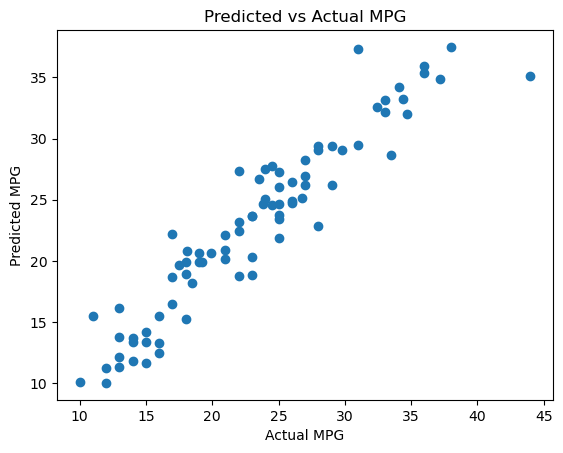

In [56]:
plt.scatter(y_test, y_pred_test)
plt.title('Predicted vs Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [57]:
def forward_selection(X, y):
    initial_features = []
    remaining_features = list(X.columns)
    best_features = []
    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features = initial_features + [candidate]
            X_new = sm.add_constant(X[features])
            model = sm.OLS(y, X_new).fit()
            score = model.rsquared_adj
            scores_with_candidates.append((score, candidate))
        best_candidate = max(scores_with_candidates)[1]
        remaining_features.remove(best_candidate)
        initial_features.append(best_candidate)
        best_features.append(best_candidate)
        print(f'Adding feature: {best_candidate}')
    return best_features

forward_selected_features = forward_selection(X, y)
print("Forward Selection Selected Features:", forward_selected_features)

Adding feature: weight
Adding feature: model_year
Adding feature: origin
Adding feature: displacement
Adding feature: acceleration
Adding feature: cylinders
Adding feature: horsepower
Forward Selection Selected Features: ['weight', 'model_year', 'origin', 'displacement', 'acceleration', 'cylinders', 'horsepower']


In [58]:
def backward_elimination(X, y):
    features = list(X.columns)
    while len(features) > 0:
        X_new = sm.add_constant(X[features])
        model = sm.OLS(y, X_new).fit()
        p_values = model.pvalues.iloc[1:]  
        worst_p_value = p_values.max()
        if worst_p_value > 0.05: 
            worst_feature = p_values.idxmax()
            print(f'Removing feature: {worst_feature}')
            features.remove(worst_feature)
        else:
            break
    return features

backward_selected_features = backward_elimination(X, y)
print("Backward Elimination Selected Features:", backward_selected_features)

Removing feature: horsepower
Removing feature: cylinders
Removing feature: acceleration
Removing feature: displacement
Backward Elimination Selected Features: ['weight', 'model_year', 'origin']


In [59]:
def stepwise_selection(X, y):
    features = []
    while True:
        changed = False
        
        # Forward step
        remaining_features = list(set(X.columns) - set(features))
        scores_with_candidates = []
        for candidate in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[features + [candidate]])).fit()
            scores_with_candidates.append((model.aic, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        current_score = model.aic
        if best_new_score < current_score:
            features.append(best_candidate)
            print(f'Adding feature: {best_candidate}')
            changed = True

        # Backward step
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        p_values = model.pvalues.iloc[1:]
        worst_p_value = p_values.max()
        if worst_p_value > 0.05:
            worst_feature = p_values.idxmax()
            features.remove(worst_feature)
            print(f'Removing feature: {worst_feature}')
            changed = True

        if not changed:
            break
    
    return features

stepwise_selected_features = stepwise_selection(X, y)
print("Stepwise Selection Selected Features:", stepwise_selected_features)

Adding feature: weight
Adding feature: model_year
Adding feature: origin
Stepwise Selection Selected Features: ['weight', 'model_year', 'origin']
